## Run INSPIRE on the mouse brain slices with different views

In this tutorial, we show INSPIRE's analysis of the Visium datasets of mouse brains, which integrates three slices offering distinct views of the brain.

The spatial transcriptomics data are publicly available.

The sagittal anterior section: https://www.10xgenomics.com/datasets/mouse-brain-serial-section-2-sagittal-anterior-1-standard-1-0-0.

The sagittal posterior section: https://www.10xgenomics.com/datasets/mouse-brain-serial-section-2-sagittal-posterior-1-standard-1-0-0.

The coronal section: https://www.10xgenomics.com/datasets/mouse-brain-section-coronal-1-standard-1-1-0.

### Import packages

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.cm import get_cmap

import INSPIRE

import warnings
warnings.filterwarnings("ignore")

### Load data

In [2]:
data_dir = "data/Visium_mouse_brain/Visium_sagittal-anterior2"
adata_st1 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Anterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st1.var_names_make_unique()

data_dir = "data/Visium_mouse_brain/Visium_sagittal-posterior2"
adata_st2 = sc.read_visium(path=data_dir,
                           count_file="V1_Mouse_Brain_Sagittal_Posterior_Section_2_filtered_feature_bc_matrix.h5")
adata_st2.var_names_make_unique()

data_dir = "data/Visium_mouse_brain/Visium_coronal"
adata_st3 = sc.read_visium(path=data_dir,
                           count_file="V1_Adult_Mouse_Brain_filtered_feature_bc_matrix.h5")
adata_st3.var_names_make_unique()

adata_st_list = [adata_st1, adata_st2, adata_st3]

### Data preprocessing

Finding highly variable genes...
shape of adata 0 before quality control:  (2825, 31040)
shape of adata 0 after quality control:  (2825, 13942)
shape of adata 1 before quality control:  (3293, 31040)
shape of adata 1 after quality control:  (3293, 13961)
shape of adata 2 before quality control:  (2702, 32272)
shape of adata 2 after quality control:  (2702, 14801)
Find 3035 shared highly variable genes among datasets.
Concatenate datasets as a full anndata for better visualization...


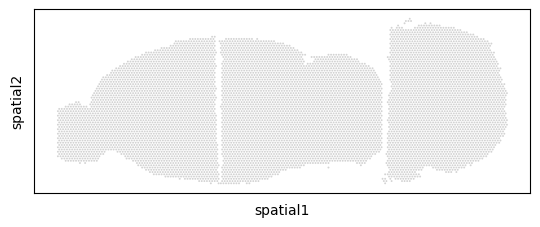

Store counts and library sizes for Poisson modeling...
Normalize data...


In [3]:
adata_st_list, adata_full = INSPIRE.utils.preprocess(adata_st_list=adata_st_list,
                                                     num_hvgs=6000,
                                                     min_genes_qc=50,
                                                     min_cells_qc=50,
                                                     spot_size=100)

### Build spatial graph

In [4]:
adata_st_list = INSPIRE.utils.build_graph_GAT(adata_st_list=adata_st_list, 
                                              rad_coef=1.1)

Start building graphs...
Calculate radius cutoff based on 'rad_coef' and mininal distance between spots/cells within a dataset...
Radius for graph connection is 150.7000.
Build graphs for GAT networks
5.8251 neighbors per cell on average.
5.8445 neighbors per cell on average.
5.8150 neighbors per cell on average.


### Run INSPIRE model

In [5]:
model = INSPIRE.model.Model_GAT(adata_st_list=adata_st_list,
                                n_spatial_factors=40,
                                n_training_steps=10000,
                                coef_geom=0.01,
                                margin_warmup_step=50
                               )

In [6]:
model.train()

  0%|          | 2/10000 [00:00<33:32,  4.97it/s]

Step: 0, d_loss: 2.7331, Loss: 5649.3413, recon_loss: 4937.4263, fe_loss: 106.2767, geom_loss: 186.7055, beta_loss: 602.2854, gan_loss: 1.4859


  5%|▌         | 502/10000 [00:47<14:58, 10.57it/s]

Step: 500, d_loss: 0.9521, Loss: -697.1736, recon_loss: -1522.8391, fe_loss: 49.7516, geom_loss: 319.1621, beta_loss: 765.7716, gan_loss: 6.9507


 10%|█         | 1002/10000 [01:34<14:11, 10.56it/s]

Step: 1000, d_loss: 1.1518, Loss: -5433.9204, recon_loss: -6314.9639, fe_loss: 48.9136, geom_loss: 283.6976, beta_loss: 822.6927, gan_loss: 6.6002


 15%|█▌        | 1502/10000 [02:22<13:27, 10.52it/s]

Step: 1500, d_loss: 0.8800, Loss: -8635.1436, recon_loss: -9520.8125, fe_loss: 48.3969, geom_loss: 280.2561, beta_loss: 828.5854, gan_loss: 5.8837


 20%|██        | 2002/10000 [03:09<12:40, 10.51it/s]

Step: 2000, d_loss: 1.0886, Loss: -10634.0869, recon_loss: -11507.7441, fe_loss: 48.0906, geom_loss: 327.4163, beta_loss: 814.7021, gan_loss: 7.5897


 25%|██▌       | 2502/10000 [03:57<11:52, 10.52it/s]

Step: 2500, d_loss: 0.6013, Loss: -11879.6201, recon_loss: -12727.9561, fe_loss: 47.7858, geom_loss: 293.8451, beta_loss: 790.5606, gan_loss: 7.0507


 30%|███       | 3002/10000 [04:44<11:05, 10.52it/s]

Step: 3000, d_loss: 0.4609, Loss: -12673.8145, recon_loss: -13485.7129, fe_loss: 47.6291, geom_loss: 268.9218, beta_loss: 754.7885, gan_loss: 6.7918


 35%|███▌      | 3502/10000 [05:32<10:17, 10.52it/s]

Step: 3500, d_loss: 0.3432, Loss: -13212.7666, recon_loss: -13987.4004, fe_loss: 47.4585, geom_loss: 282.9538, beta_loss: 717.3875, gan_loss: 6.9583


 40%|████      | 4002/10000 [06:19<09:29, 10.53it/s]

Step: 4000, d_loss: 0.3514, Loss: -13593.1621, recon_loss: -14329.6201, fe_loss: 47.3218, geom_loss: 315.2289, beta_loss: 677.1065, gan_loss: 8.8773


 45%|████▌     | 4502/10000 [07:07<08:42, 10.52it/s]

Step: 4500, d_loss: 0.2005, Loss: -13872.1143, recon_loss: -14582.3066, fe_loss: 47.1982, geom_loss: 309.1494, beta_loss: 651.4415, gan_loss: 8.4611


 50%|█████     | 5002/10000 [07:54<07:55, 10.52it/s]

Step: 5000, d_loss: 0.1906, Loss: -14063.4629, recon_loss: -14748.6152, fe_loss: 47.1153, geom_loss: 293.2274, beta_loss: 626.4838, gan_loss: 8.6207


 55%|█████▌    | 5502/10000 [08:42<07:07, 10.52it/s]

Step: 5500, d_loss: 0.1516, Loss: -14208.2852, recon_loss: -14885.7842, fe_loss: 47.0133, geom_loss: 296.2711, beta_loss: 618.7848, gan_loss: 8.7371


 60%|██████    | 6002/10000 [09:29<06:19, 10.53it/s]

Step: 6000, d_loss: 0.1653, Loss: -14299.7744, recon_loss: -14972.8652, fe_loss: 46.9462, geom_loss: 301.5018, beta_loss: 614.2016, gan_loss: 8.9290


 65%|██████▌   | 6502/10000 [10:17<05:32, 10.52it/s]

Step: 6500, d_loss: 0.1506, Loss: -14376.8828, recon_loss: -15043.1172, fe_loss: 46.8753, geom_loss: 267.8856, beta_loss: 607.7770, gan_loss: 8.9038


 70%|███████   | 7002/10000 [11:04<04:44, 10.53it/s]

Step: 7000, d_loss: 0.1917, Loss: -14439.1348, recon_loss: -15102.8418, fe_loss: 46.8440, geom_loss: 254.6296, beta_loss: 605.3604, gan_loss: 8.9569


 75%|███████▌  | 7502/10000 [11:52<03:57, 10.52it/s]

Step: 7500, d_loss: 0.1680, Loss: -14515.0127, recon_loss: -15175.0264, fe_loss: 46.7815, geom_loss: 236.3670, beta_loss: 601.6378, gan_loss: 9.2319


 80%|████████  | 8002/10000 [12:39<03:09, 10.52it/s]

Step: 8000, d_loss: 0.1168, Loss: -14633.4863, recon_loss: -15293.2607, fe_loss: 46.7422, geom_loss: 230.3314, beta_loss: 601.5674, gan_loss: 9.1608


 85%|████████▌ | 8502/10000 [13:27<02:22, 10.52it/s]

Step: 8500, d_loss: 0.0763, Loss: -14748.2803, recon_loss: -15408.4658, fe_loss: 46.6535, geom_loss: 226.3674, beta_loss: 602.0280, gan_loss: 9.2405


 90%|█████████ | 9002/10000 [14:14<01:34, 10.52it/s]

Step: 9000, d_loss: 0.0787, Loss: -14822.2188, recon_loss: -15482.0605, fe_loss: 46.5831, geom_loss: 221.9920, beta_loss: 601.6428, gan_loss: 9.3964


 95%|█████████▌| 9502/10000 [15:01<00:47, 10.53it/s]

Step: 9500, d_loss: 0.0636, Loss: -14866.1875, recon_loss: -15525.4297, fe_loss: 46.5500, geom_loss: 237.7550, beta_loss: 600.9050, gan_loss: 9.4096


100%|██████████| 10000/10000 [15:49<00:00, 10.53it/s]


### Access spot representations, proportions of spatial factors in spots, and gene loading matrix

In this example, we also evalute the the discriminator scores on spots.

In [7]:
adata_full, basis_df, d_score_dict = model.eval(adata_full, eval_d_scores=True)
basis = np.array(basis_df.values)

Add cell/spot proportions of spatial factors into adata_full.obs...
Add cell/spot latent representations into adata_full.obsm['latent']...
Evaluate discriminator scores...


### Spatial distributions of spatial factors in tissues

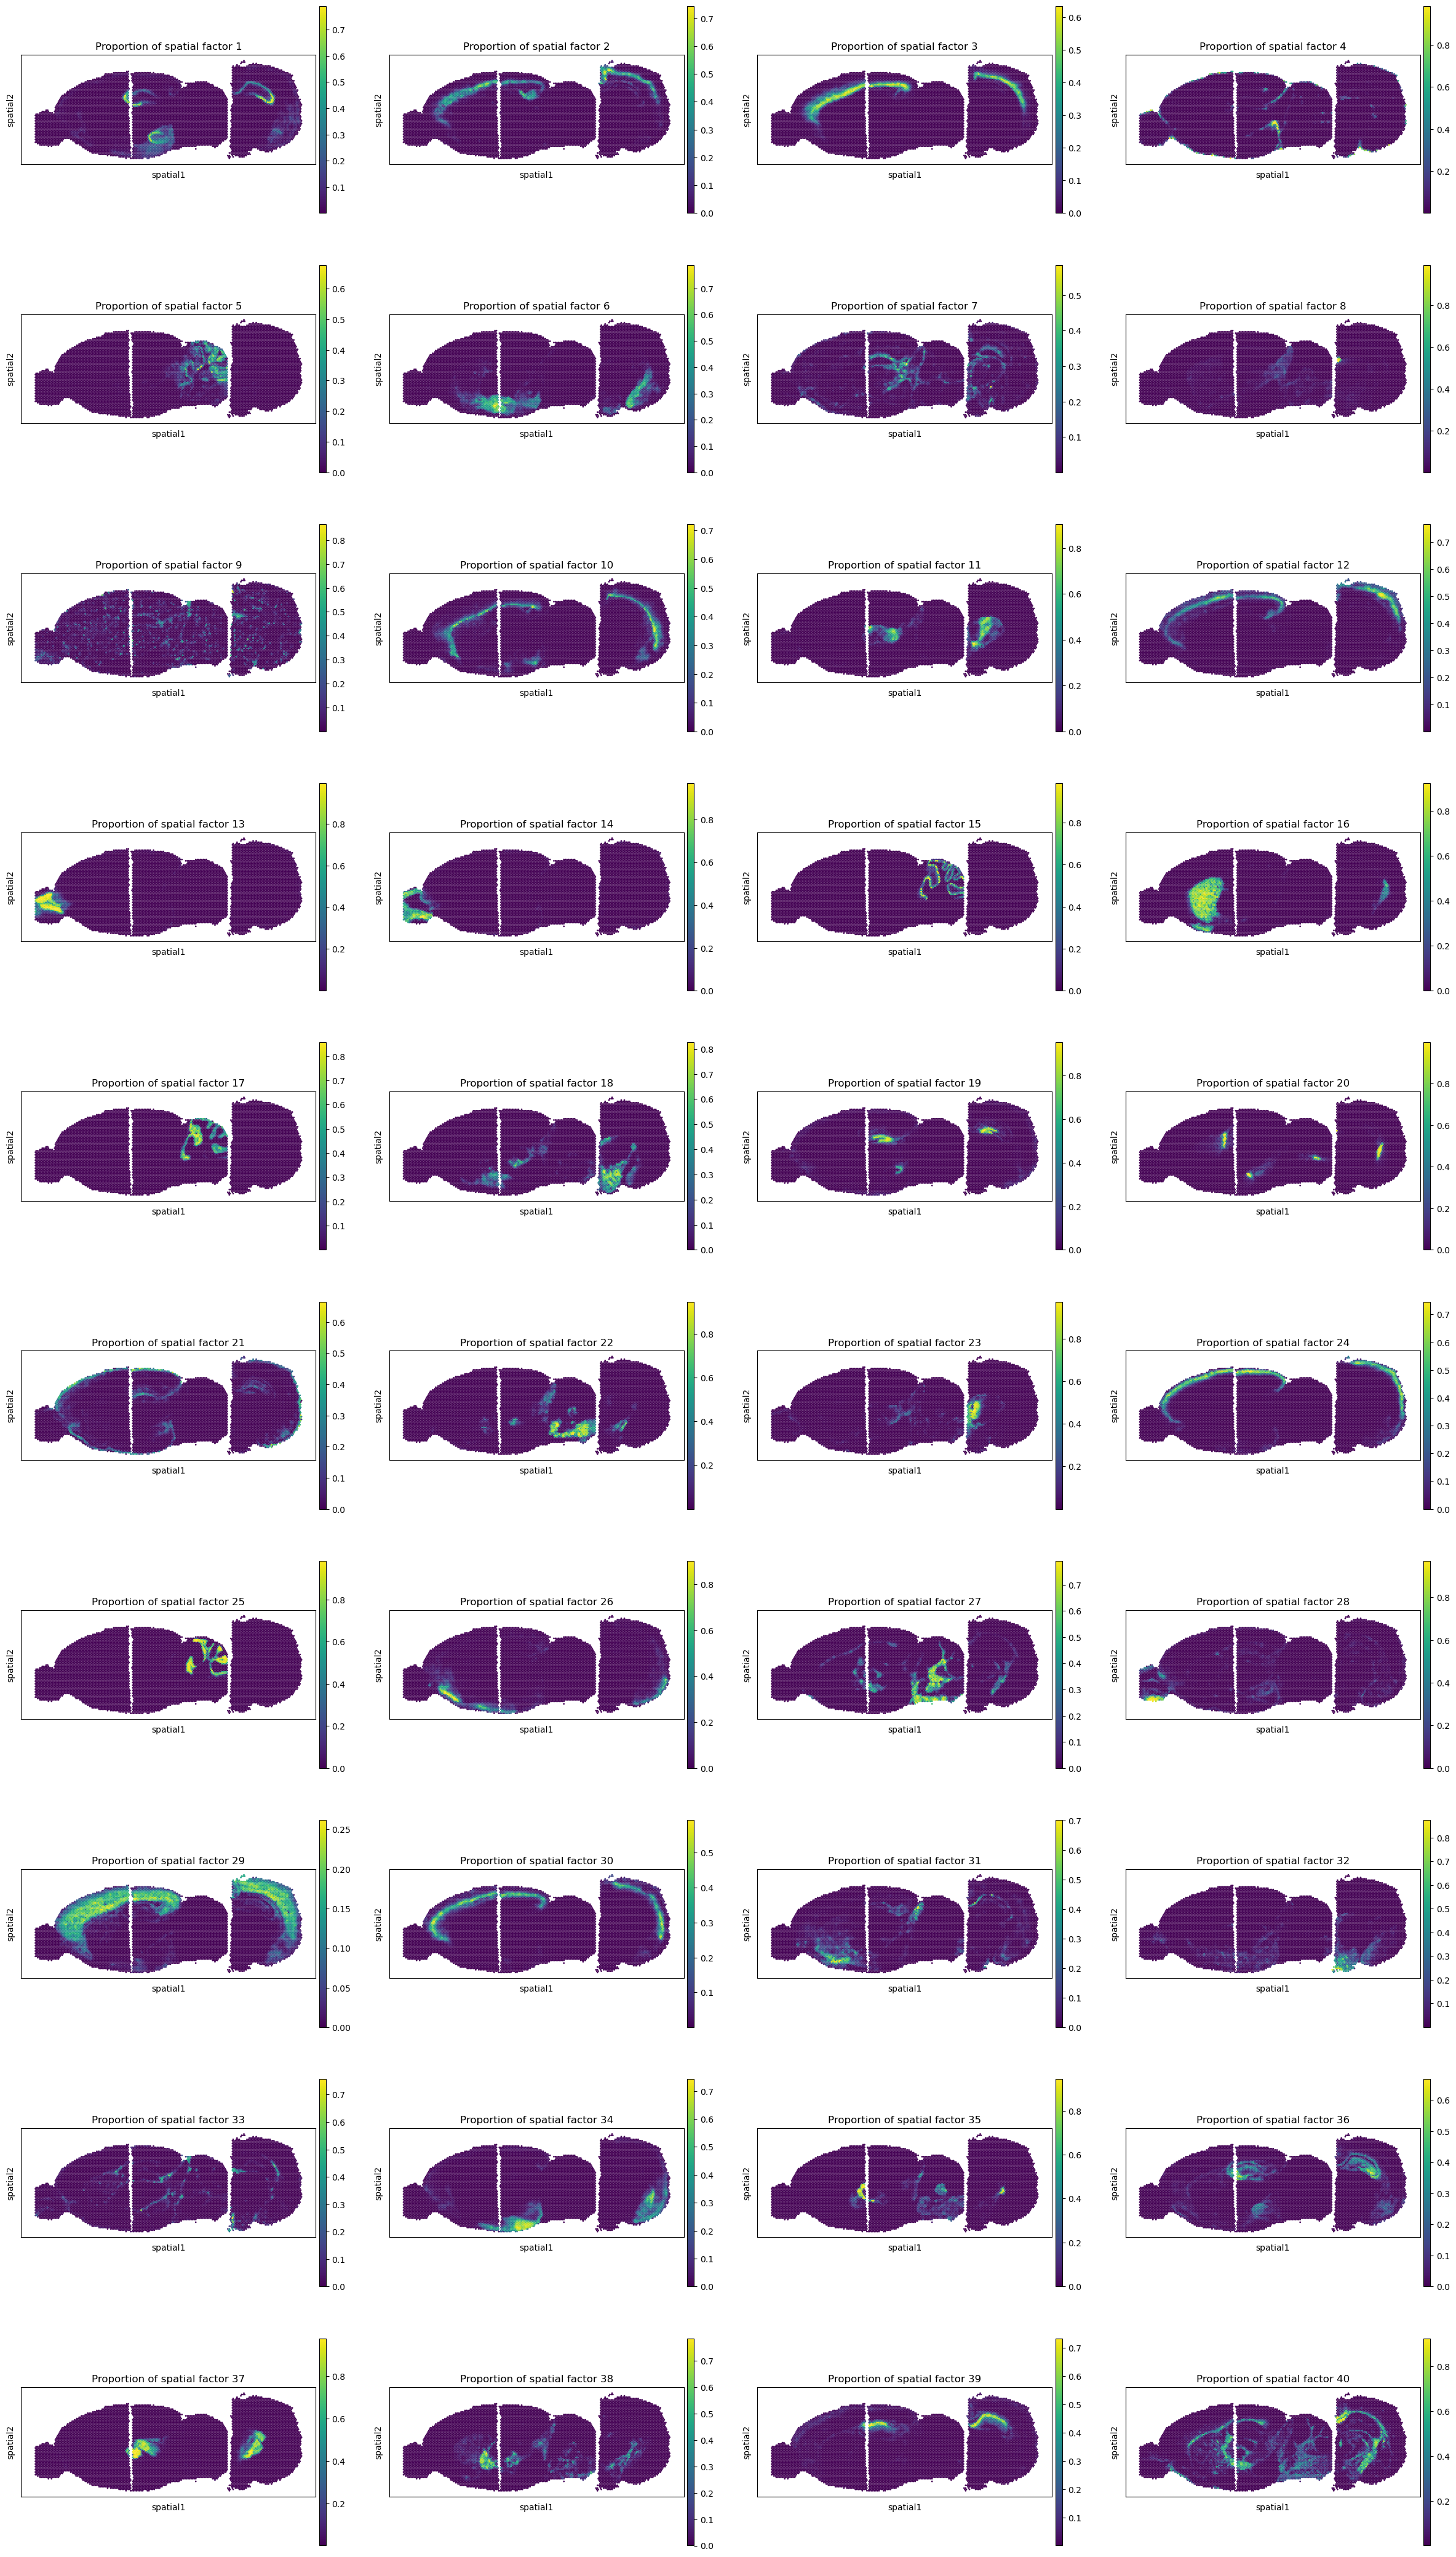

In [8]:
sc.pl.spatial(adata_full, color=["Proportion of spatial factor "+str(i+1) for i in range(40)], spot_size=150.)

### Spot representations and spatial domain identification

In [9]:
# calculate 2D UMAP coordinate of spots based on INSPIRE's learned spot representations.
reducer = umap.UMAP(n_neighbors=30,
                    n_components=2,
                    metric="correlation",
                    n_epochs=None,
                    learning_rate=1.0,
                    min_dist=0.3,
                    spread=1.0,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1,
                    repulsion_strength=1,
                    negative_sample_rate=5,
                    a=None,
                    b=None,
                    random_state=1234,
                    metric_kwds=None,
                    angular_rp_forest=False,
                    verbose=True)
embedding = reducer.fit_transform(adata_full.obsm['latent'])
adata_full.obsm["X_umap"] = embedding
adata_full.obs["slice"] = adata_full.obs["slice"].values.astype(str)

UMAP(angular_rp_forest=True, local_connectivity=1, metric='correlation', min_dist=0.3, n_neighbors=30, random_state=1234, repulsion_strength=1, verbose=True)
Wed Aug 21 10:46:27 2024 Construct fuzzy simplicial set
Wed Aug 21 10:46:27 2024 Finding Nearest Neighbors
Wed Aug 21 10:46:27 2024 Building RP forest with 10 trees
Wed Aug 21 10:46:29 2024 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	Stopping threshold met -- exiting after 2 iterations
Wed Aug 21 10:46:38 2024 Finished Nearest Neighbor Search
Wed Aug 21 10:46:39 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Aug 21 10:46:59 2024 Finished embedding


Visualization of discriminator scores.

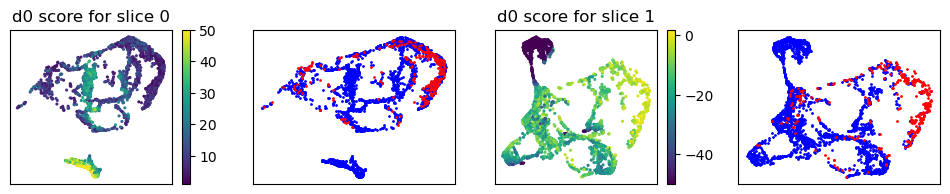

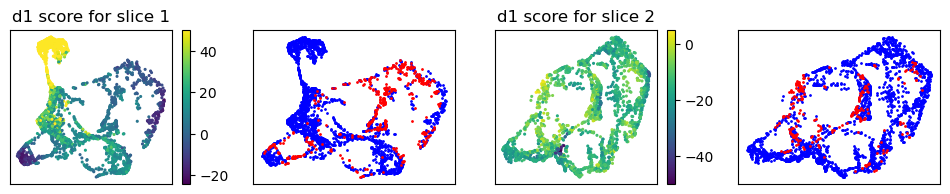

In [10]:
n_slices = len(adata_st_list)
for i in range(n_slices-1):
    # slice i - slice i+1
    d0 = d_score_dict[i][0]
    d1 = d_score_dict[i][1]
    margin = model.margin
    
    f = plt.figure(figsize=(12,2))
    
    ax1 = f.add_subplot(1,4,1)
    scatter1 = ax1.scatter(adata_full[adata_st_list[i].obs.index, :].obsm["X_umap"][:,0],
                           adata_full[adata_st_list[i].obs.index, :].obsm["X_umap"][:,1],
                           c=d0, s=1.5)
    ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
    plt.colorbar(scatter1, ax=ax1)
    ax1.set_title("d"+str(i)+" score for slice "+str(i))
    ax1 = f.add_subplot(1,4,2)
    ad_tmp = adata_full[adata_st_list[i].obs.index, :].copy()
    scatter = ax1.scatter(ad_tmp[(d0 < -margin) | (d0 > margin)].obsm["X_umap"][:,0],
                          ad_tmp[(d0 < -margin) | (d0 > margin)].obsm["X_umap"][:,1],
                          c="blue", s=1., label="inactive")
    scatter = ax1.scatter(ad_tmp[(d0 > -margin) & (d0 < margin)].obsm["X_umap"][:,0],
                          ad_tmp[(d0 > -margin) & (d0 < margin)].obsm["X_umap"][:,1],
                          c="red", s=1., label="active")
    ax1.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

    ax2 = f.add_subplot(1,4,3)
    scatter2 = ax2.scatter(adata_full[adata_st_list[i+1].obs.index, :].obsm["X_umap"][:,0],
                           adata_full[adata_st_list[i+1].obs.index, :].obsm["X_umap"][:,1],
                           c=d1, s=1.5)
    ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
    ax2.set_title("d"+str(i)+" score for slice "+str(i+1))
    plt.colorbar(scatter2, ax=ax2)
    ax2 = f.add_subplot(1,4,4)
    ad_tmp = adata_full[adata_st_list[i+1].obs.index, :].copy()
    scatter = ax2.scatter(ad_tmp[(d1 < -margin) | (d1 > margin)].obsm["X_umap"][:,0],
                          ad_tmp[(d1 < -margin) | (d1 > margin)].obsm["X_umap"][:,1],
                          c="blue", s=1., label="inactive")
    scatter = ax2.scatter(ad_tmp[(d1 > -margin) & (d1 < margin)].obsm["X_umap"][:,0],
                          ad_tmp[(d1 > -margin) & (d1 < margin)].obsm["X_umap"][:,1],
                          c="red", s=1., label="active")
    ax2.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)

    plt.show()
    plt.close()

In [11]:
# clustering
sc.pp.neighbors(adata_full, use_rep="latent", n_neighbors=20)
sc.tl.louvain(adata_full, resolution=2.)

Visualization of spot representations.

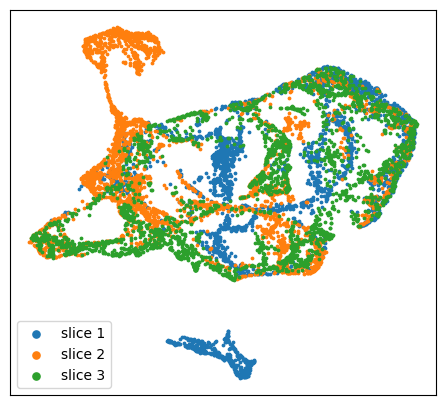

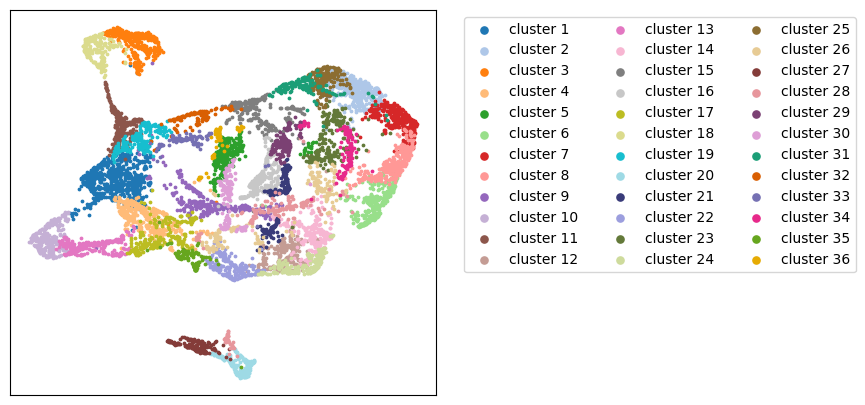

In [12]:
# visualize umaps
size = 3.

rgb_10 = [i for i in get_cmap('Set3').colors]
rgb_20 = [i for i in get_cmap('tab20').colors]
rgb_20b = [i for i in get_cmap('tab20b').colors]
rgb_dark2 = [i for i in get_cmap('Dark2').colors]
rgb_pst1 = [i for i in get_cmap('Pastel1').colors]
rgb_acc = [i for i in get_cmap('Accent').colors]
rgb2hex_10 = [mpl.colors.rgb2hex(color) for color in rgb_10]
rgb2hex_20 = [mpl.colors.rgb2hex(color) for color in rgb_20]
rgb2hex_20b = [mpl.colors.rgb2hex(color) for color in rgb_20b]
rgb2hex_20b_new = [rgb2hex_20b[i] for i in [0, 3, 4, 7, 8, 11, 12, 15, 16, 19]]
rgb2hex_dark2 = [mpl.colors.rgb2hex(color) for color in rgb_dark2]
rgb2hex_pst1 = [mpl.colors.rgb2hex(color) for color in rgb_pst1]
rgb2hex_acc = [mpl.colors.rgb2hex(color) for color in rgb_acc]
rgb2hex = rgb2hex_20 + rgb2hex_20b_new + rgb2hex_dark2 + rgb2hex_pst1 + rgb2hex_acc

embedding = adata_full.obsm["X_umap"]

# umap, slice
f = plt.figure(figsize=(5.5,5))
ax = f.add_subplot(1,1,1)
colors = ["tab:blue", "tab:orange","tab:green"]
for i in range(len(set(adata_full.obs["slice"]))):
    ax.scatter(embedding[adata_full.obs["slice"]==str(i), 0], embedding[adata_full.obs["slice"]==str(i), 1], 
               s=size, c=colors[i], label="slice "+str(i+1))
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.legend(markerscale=3)
plt.show()

# umap, louvain
f = plt.figure(figsize=(5.5,5))
ax = f.add_subplot(1,1,1)
n_louvain = len(set(adata_full.obs["louvain"]))
colors = rgb2hex
for i in range(n_louvain):
    ax.scatter(embedding[adata_full.obs["louvain"].values.astype(str)==str(i), 0], 
               embedding[adata_full.obs["louvain"].values.astype(str)==str(i), 1], 
               s=size, c=colors[i], label="cluster "+str(i+1))
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.legend(markerscale=3, ncol=3, bbox_to_anchor=(2,1))
plt.show()

Visualization of spatial domain identification result.

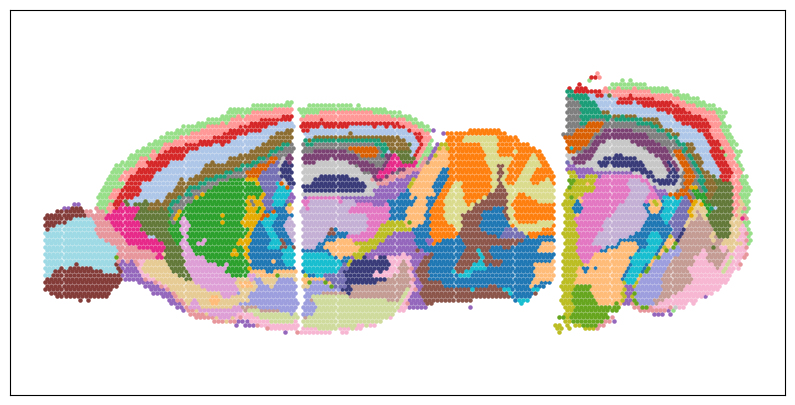

In [13]:
# spatial regions
size = 5.
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(1,1,1)
ax.axis('equal')
colors = rgb2hex
for i in range(n_louvain):
    ax.scatter(adata_full.obsm["spatial"][adata_full.obs["louvain"].values.astype(str)==str(i), 0], 
               -adata_full.obsm["spatial"][adata_full.obs["louvain"].values.astype(str)==str(i), 1], 
               s=size, c=colors[i], label="cluster "+str(i))
ax.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
plt.show()

### Save results

In [14]:
res_path = "Results/INSPIRE_brain_different_views"
adata_full.write(res_path + "/adata_inspire.h5ad")
basis_df.to_csv(res_path + "/basis_df_inspire.csv")